# What is Logistic Regression

> Logistic regression is a classification algorithm. It is a generalized linear model that we can use to predict *categorical* outcome variables.

> For example, logistic regression can be used to classify whether someone will be denied or approved for a loan based on his existing features (such as salary, debts, savings etc.) 

><img src="./assets/Logistic_Reggresion/logistic_reg.gif" width="700"> 


### Logistic Regression Assumptions

> ●   Binary logistic regression requires the dependent variable to be binary.

>   ● For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.

>   ● Only the meaningful variables should be included.

> ● The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.
 
> ● The independent variables are linearly related to the log odds.
 
> ● Logistic regression requires quite large sample sizes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
from IPython.display import Image
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Mathematical formulation the problem

> ### Hypothesis for classification

>$$h(x_i)  = g(\beta^T x_i) = \frac{1}{1+e^-\beta T x_i}$$
>where,$$g(z) = \frac{1}{1+e^-z}$$
>is called logistic function or the **sigmoid function**.

> Here is a plot showing $g(z)$ i.e **sigmoid function**: 

<img src="./assets/Logistic_Reggresion/logistic-function.png" width="350">

> In logistic regression, we’re essentially trying to find the weights that maximize the likelihood of producing our given data and use them to categorize the response variable. 
In simple words, we can take our linear regression solution and place it into the sigmoid function and it looks something like this:
<img src="./assets/Logistic_Reggresion/linear_on_logistic.png" width="500">

>We can infer from above graph that:

>    <em>g(z) or probability </em> tends towards 1 as $z\rightarrow\infty$

>    <em>g(z) or probability </em> tends towards 0 as $z\rightarrow-\infty$

>    <em>g(z) or probability </em> is always bounded between 0 and 1

### Decision boundary 

> Decision boundary helps to differentiate probabilities into positive class and negative class. 

> It can be linear or non linear, of any shape. We train the model to match the decision boundary to seperate one class from another

> In Logistic regression, it is assumed Decision boundary is linear and model will be trained to find the best linear decision boundary to seperate between classes. 

><img src="./assets/Logistic_Reggresion/decision_bound.jpeg" width="300">

In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

**Cost Function**
> The most commonly used **cost function** for logistic regression analysis is **Log Likelihood** 
><img src="./assets/Logistic_Reggresion/ll.gif" width="400">
> The **cost function** for logistic regression is proportional to inverse of likelihood of parameters. Hence, we can obtain an expression for cost function, J using **log likelihood equation** as:
><img src="./assets/Logistic_Reggresion/cf.gif" width="400">
> Our aim here is to estimate *$\beta$* so that cost function is minimized.
> Below plots explains cost function of logistic regression
><img src="./assets/Logistic_Reggresion/cost_fn.png" width="600">

In [3]:
def log_likelihood(features, target, weights):
    z = np.dot(features, weights)
    ll = np.sum( target*z - np.log(1 + np.exp(z)) )
    return ll

# Reading the Dataset

## Titanic Dataset 
> It describes the survival status of individual passengers on the Titanic

### Description of the data

>**Pclass:** Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)<br>
>**Survived:** Survival (0 = No; 1 = Yes)<br>
>**Name:** Name of the Passenger<br>
>**Sex:** Sex of the Passenger<br>
>**Age:** Age of the Passenger<br>
>**Sibsp:** Number of Siblings/Spouses Aboard<br>
>**Parch:** Number of Parents/Children Aboard<br>
>**Ticket:** Ticket Number<br>
>**Fare:** Passenger Fare (British pound)<br>
>**Cabin:** Cabin<br>
>**Embarked:** Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)<br>


In [4]:
# Reading Titanic data using pandas
data = pd.read_csv('../data/titanic/train.csv')

In [5]:
# Removing unnecessary columns
data = data.drop(['Name', 'Ticket', 'Fare', 'Cabin', 'PassengerId'], axis=1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


## Imputation

Imputation is a process of imputing or filling the missing values in the data with reasonable values or metrics of the particular column.

Usually for Continous columns Missing values are imputed by Mean, Median of the column and Categorical columns are imputed by Most frequent value of that column or 'Others' or miscellanous  

In [6]:
# Finding missing values
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
dtype: int64

In [7]:
# Filling those missing values with mean value of the column
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Embarked'] = data['Embarked'].fillna('S')
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


## One-Hot Encoding

One hot encoding is a method of representing categorical columns into set of boolean columns denoting the presence of each category in a column. For example a categorical column 'week' containing 7 categories:

| week |
|------|
| Mon  |
| Tue  |
| Wed  |
| Thu  |
| Fri  |
| Sat  |
| Sun  |

is converted into 7 boolean columns denoting the presence of each day. In this example, Column 'week_Mon' represents the occurence of 'Monday' in 'week' column (i.e 1 when 'week' is 'Monday' 0 when others) 

| week_Mon | week_Tue | week_Wed | week_Thu | week_Fri | week_Sat | week_Sun |
|-----|-----|-----|-----|-----|-----|-----|
| 1   | 0   | 0   | 0   | 0   |  0  |  0  |
| 0   | 1   | 0   | 0   | 0   |  0  |  0  |
| 0   | 0   | 1   | 0   | 0   |  0  |  0  |
| 0   | 0   | 0   | 1   | 0   |  0  |  0  |
| 0   | 0   | 0   | 0   | 1   |  0  |  0  |
| 0   | 0   | 0   | 0   | 0   |  1  |  0  |
| 0   | 0   | 0   | 0   | 0   |  0  |  1  |

In [8]:
data = pd.get_dummies(data)
data.head()

,Survived,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,0,1,0,0,1
1,1,1,38.0,1,0,1,0,1,0,0
2,1,3,26.0,0,0,1,0,0,0,1
3,1,1,35.0,1,0,1,0,0,0,1
4,0,3,35.0,0,0,0,1,0,0,1


In [9]:
# Preparing training data and evaluation data
train_labels = data['Survived'].values[:600]
train_data = data.drop('Survived', axis=1).values[:600]
eval_labels = data['Survived'].values[600:]
eval_data = data.drop('Survived', axis=1).values[600:]

## **Building the model using Sklearn**

In [10]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True)
clf.fit(train_data, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [11]:
print ('Accuracy of the model on train data: {0}'.format(clf.score(train_data, train_labels)))

Accuracy of the model on train data: 0.8033333333333333


In [12]:
print ('Accuracy of the model on eval data: {0}'.format(clf.score(eval_data, eval_labels)))

Accuracy of the model on eval data: 0.7903780068728522


Text(0.5, 257.44, 'Predicted label')

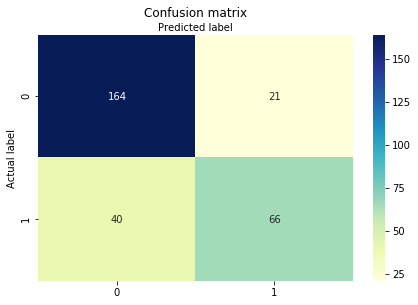

In [13]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
eval_predictions = clf.predict(eval_data)
cm = confusion_matrix(eval_labels, eval_predictions)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [14]:
tn, fp, fn, tp = cm.ravel()
print('True Positives are {}'.format(tp))
print('True Negatives are {}'.format(tn))
print('False Positives are {}'.format(fp))
print('False Negatives are {}'.format(fn))

True Positives are 66
True Negatives are 164
False Positives are 21
False Negatives are 40


## Precision and Recall 

> Precision is as a measure of exactness or quality.
><img src="./assets/Logistic_Reggresion/precision.svg" width="150">

> Recall is a measure of completeness or quantity.
><img src="./assets/Logistic_Reggresion/recall.svg" width="150">

In [15]:
precision = tp/(tp+fp)
recall = tp/(tp+fn)
print(precision, recall)

0.7586206896551724 0.6226415094339622


### ROC Curve
>   ● ROC Curve analysis to find an optimal cut_off point.

>   ● The areas under ROC curves (i.e Area Under Curve) are used to compare the usefulness of tests

><img src="./assets/Logistic_Reggresion/ROC.gif" width="250">

>  In the above graph, Test A is superior to test B because at all cut-offs the true positive rate is higher and the false positive rate is lower than for test B. The area under the curve for test A is larger than the area under the curve for test B.

><img src="./assets/Logistic_Reggresion/AUC_table.gif" width="200">

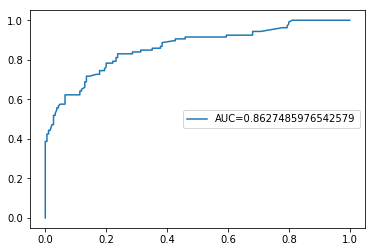

In [16]:
y_pred_proba = clf.predict_proba(eval_data)[::,1]
fpr, tpr, _ = roc_curve(eval_labels, y_pred_proba)
auc = roc_auc_score(eval_labels, y_pred_proba)
plt.plot(fpr, tpr, label="AUC="+str(auc))
plt.legend(loc=5)
plt.show()

## Feature Engineering

> Now, we perform the same Logistic Regression by applying few feature engineering techniques on them

In [17]:
# Read the data into pandas dataframe
df_train = pd.read_csv('../data/titanic/train.csv')
survived_train = df_train.Survived
data = df_train.drop(['Survived'], axis=1)
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Converting the columns into useful information
 "Name" column contains strings or text that contain titles, such as 'Mr', 'Master' and 'Dona'.

  These titles of course give you information on social status, profession, etc., which in the end could tell you something more about survival. A new feature Title could be extracted out of the 'Name' column decribing the title of the passenger

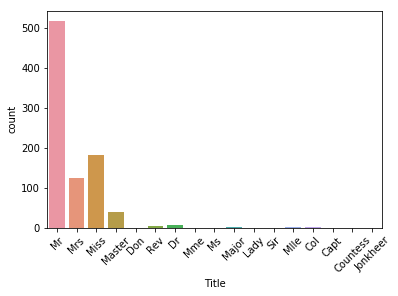

In [18]:
data['Title'] = data.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))
sns.countplot(x='Title', data=data);
plt.xticks(rotation=45);

### All the less frequent Titles are renamed as 'Special'

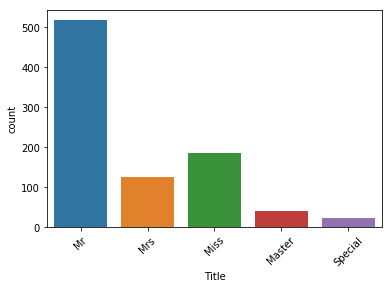

In [19]:
data['Title'] = data['Title'].replace({'Mlle':'Miss', 'Mme':'Mrs', 'Ms':'Miss'})
data['Title'] = data['Title'].replace(['Don', 'Dona', 'Rev', 'Dr',
                                            'Major', 'Lady', 'Sir', 'Col', 'Capt', 'Countess', 'Jonkheer'],'Special')
sns.countplot(x='Title', data=data);
plt.xticks(rotation=45);

### Creating the new column stating whether passenger has cabin or not

In [20]:
data['Has_Cabin'] = ~data.Cabin.isnull()
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Has_Cabin
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,False
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,True
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,False
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,True
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,False


### Removing the columns which are of no use for the model

In [21]:
data.drop(['Cabin', 'Name', 'PassengerId', 'Ticket'], axis=1, inplace=True)
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Has_Cabin
0,3,male,22.0,1,0,7.2500,S,Mr,False
1,1,female,38.0,1,0,71.2833,C,Mrs,True
2,3,female,26.0,0,0,7.9250,S,Miss,False
3,1,female,35.0,1,0,53.1000,S,Mrs,True
4,3,male,35.0,0,0,8.0500,S,Mr,False


## Finding the missing values in the data

In [22]:
data.isnull().sum()

Pclass         0
Sex            0
Age          177
SibSp          0
Parch          0
Fare           0
Embarked       2
Title          0
Has_Cabin      0
dtype: int64

### Filling the missing columns with median of the respective columns

In [23]:
data['Age'] = data.Age.fillna(data.Age.median())
data['Fare'] = data.Fare.fillna(data.Fare.median())
data['Embarked'] = data['Embarked'].fillna('S')

### Feature Binning
#### Feature binning is a method of grouping the values into a pre-defined number of bins.


In [24]:
data['CatAge'] = pd.qcut(data.Age, q=4, labels=False )
data['CatFare']= pd.qcut(data.Fare, q=4, labels=False)
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Has_Cabin,CatAge,CatFare
0,3,male,22.0,1,0,7.2500,S,Mr,False,0,0
1,1,female,38.0,1,0,71.2833,C,Mrs,True,3,3
2,3,female,26.0,0,0,7.9250,S,Miss,False,1,1
3,1,female,35.0,1,0,53.1000,S,Mrs,True,2,3
4,3,male,35.0,0,0,8.0500,S,Mr,False,2,1


In [25]:
## dropping the original columns as the converted columns are used for training
data = data.drop(['Age', 'Fare'], axis=1)
data.head()

,Pclass,Sex,SibSp,Parch,Embarked,Title,Has_Cabin,CatAge,CatFare
0,3,male,1,0,S,Mr,False,0,0
1,1,female,1,0,C,Mrs,True,3,3
2,3,female,0,0,S,Miss,False,1,1
3,1,female,1,0,S,Mrs,True,2,3
4,3,male,0,0,S,Mr,False,2,1


### Creating a new column which is the number of members in families that were onboard of the Titanic

In [26]:
data['Fam_Size'] = data.Parch + data.SibSp
data = data.drop(['SibSp','Parch'], axis=1)
data.head()

,Pclass,Sex,Embarked,Title,Has_Cabin,CatAge,CatFare,Fam_Size
0,3,male,S,Mr,False,0,0,1
1,1,female,C,Mrs,True,3,3,1
2,3,female,S,Miss,False,1,1,0
3,1,female,S,Mrs,True,2,3,1
4,3,male,S,Mr,False,2,1,0


### Doing One-hot encoding

In [27]:
data_dum = pd.get_dummies(data, drop_first=False)
data_dum.head()

,Pclass,Has_Cabin,CatAge,CatFare,Fam_Size,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Special
0,3,False,0,0,1,0,1,0,0,1,0,0,1,0,0
1,1,True,3,3,1,1,0,1,0,0,0,0,0,1,0
2,3,False,1,1,0,1,0,0,0,1,0,1,0,0,0
3,1,True,2,3,1,1,0,0,0,1,0,0,0,1,0
4,3,False,2,1,0,0,1,0,0,1,0,0,1,0,0


In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
model = LogisticRegression(fit_intercept=True)

In [30]:
train_data = data_dum.values[:600]
labels = survived_train[:600]
eval_data = data_dum.values[600:]
eval_labels = survived_train[600:]

In [31]:
model.fit(train_data, labels)
eval_predictions = model.predict(eval_data)

In [32]:
print('Accuracy of the model on train data: {0}'.format(model.score(train_data, labels)))

Accuracy of the model on train data: 0.83


In [33]:
print('Accuracy of the model on eval data: {0}'.format(model.score(eval_data, eval_labels)))

Accuracy of the model on eval data: 0.8487972508591065


Text(0.5, 257.44, 'Predicted label')

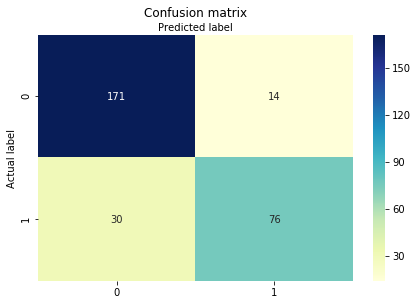

In [34]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
cm = confusion_matrix(eval_labels, eval_predictions)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [35]:
tn, fp, fn, tp = cm.ravel()

In [36]:
precision = tp/(tp+fp) # 81/(81+23)
recall = tp/(tp+fn) # 81/(81+30)
print(precision, recall)

0.8444444444444444 0.7169811320754716


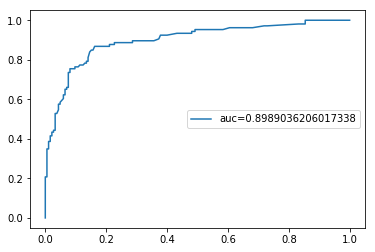

In [37]:
y_pred_proba = model.predict_proba(eval_data)[::,1]
fpr, tpr, _ = roc_curve(eval_labels,  y_pred_proba)
auc = roc_auc_score(eval_labels, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=5)
plt.show()

## Multinomial Logistic Regression
>  ● In Multinomial Logistic Regression, the output variable can have **more than two possible discrete outputs**. Consider the Digit Dataset. Here, the output variable is the digit value which can take values out of (0, 1, 2, 3, 4, 5, 6, 7, 8, 9).


### Conclusion
> ● In this tutorial, we covered a lot of details about Logistic Regression. We have learned what the logistic regression is, how to build respective models, how to visualize results and some of the theoretical background information. Also, we covered some basic concepts such as the sigmoid function, cost function i.e log likelihood function, confusion matrix, ROC curve.

#### At last, here are some points about Logistic regression to ponder upon:

>  ●     It is assumes that the data is linearly separable

>  ●    Logistic regression does work better when you remove attributes that are unrelated to the output variable as well as attributes that are very similar (correlated) to each other. 

> ●     Independent variables can be even the power terms or some other nonlinear transformations of the original independent variables.

> ●     The dependent variable does NOT need to be normally distributed, but it typically assumes a distribution from an exponential family (e.g. binomial, Poisson, multinomial, normal,…); binary logistic regression assume binomial distribution of the response.
